## Imports

In [1]:
from service_functions.broker_report import broker_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Initialization class

In [2]:
report = broker_report('/path_to_report.xls',
                       init_cash=100000)

WARNING *** file size (1384384) not 512 + multiple of sector size (512)


## Description

### General information

The first dataframe contains general data with trades. This includes the ticker, average price and quantity, trade number, and final outcome.

In [3]:
report.df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 899 entries, 2022-02-24 12:48:32 to 2022-05-05 13:59:59
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ticker           899 non-null    object 
 1   price            899 non-null    float64
 2   q                899 non-null    int64  
 3   fee              899 non-null    float64
 4   position         899 non-null    int64  
 5   trade_num        899 non-null    float64
 6   avg_entry_price  899 non-null    float64
 7   trade_side       899 non-null    object 
 8   pnl              242 non-null    float64
 9   cum_pnl          242 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 77.3+ KB


In [4]:
report.df.tail()

,ticker,price,q,fee,position,trade_num,avg_entry_price,trade_side,pnl,cum_pnl
datetime,,,,,,,,,,
2022-05-05 11:50:20,Si-6.22,67465.0,1,0.90,-2,240.0,67799.0,short,NaN,NaN
2022-05-05 11:52:04,Si-6.22,67286.0,1,0.90,-1,240.0,68312.0,short,NaN,NaN
2022-05-05 11:52:04,Si-6.22,67286.0,1,0.90,0,240.0,68312.0,short,1026.0,110517.0
2022-05-05 12:55:28,Si-6.22,67338.0,1,1.96,1,241.0,67338.0,long,NaN,NaN
2022-05-05 13:59:59,Si-6.22,67348.0,-1,0.90,0,241.0,67338.0,long,10.0,110527.0


PnL and Cum_PnL are calculated at the moment of closing the position:

In [5]:
report.df.loc[report.df.position == 0].sample(5)

,ticker,price,q,fee,position,trade_num,avg_entry_price,trade_side,pnl,cum_pnl
datetime,,,,,,,,,,
2022-04-29 12:07:55,Si-6.22,72146.0,-1,0.9,0,214.0,72083.0,long,63.0,108649.0
2022-04-26 10:45:53,Si-6.22,74832.0,2,1.8,0,200.0,74837.5,short,11.0,105033.0
2022-03-30 18:44:41,Si-6.22,87954.0,1,0.9,0,36.0,88018.0,short,64.0,103974.0
2022-03-31 16:44:21,Si-6.22,88150.0,1,0.9,0,42.0,87784.0,short,-366.0,104054.0
2022-03-10 18:08:08,Si-3.22,118281.0,1,0.9,0,26.0,117571.0,short,-710.0,99162.0


Thus, the dataframe presents general information, taking into account transactions for different instruments that could occur at approximately the same time.

It is possible to separately examine each trade in terms of position addition/reduction:

In [6]:
report.df.loc[report.df.trade_num == 5]

,ticker,price,q,fee,position,trade_num,avg_entry_price,trade_side,pnl,cum_pnl
datetime,,,,,,,,,,
2022-02-24 14:13:52,BR-3.22,104.61,1,4.4,1,5.0,104.61,long,NaN,NaN
2022-02-24 14:14:04,BR-3.22,104.61,1,4.4,2,5.0,104.61,long,NaN,NaN
2022-02-24 14:25:19,BR-3.22,104.68,-1,0.9,1,5.0,104.54,long,NaN,NaN
2022-02-24 14:32:47,BR-3.22,104.42,1,4.4,2,5.0,104.48,long,NaN,NaN
2022-02-24 14:56:39,BR-3.22,105.03,-1,0.9,1,5.0,103.93,long,NaN,NaN
2022-02-24 14:56:50,BR-3.22,105.05,-1,0.9,0,5.0,103.93,long,784.0,100392.0


This division into trades will allow for a more detailed analysis of the trading system in the future. For example, one could compare it with intraday data and examine what would have happened if the position had been closed earlier or later.

Let's take a look at the final trading result:

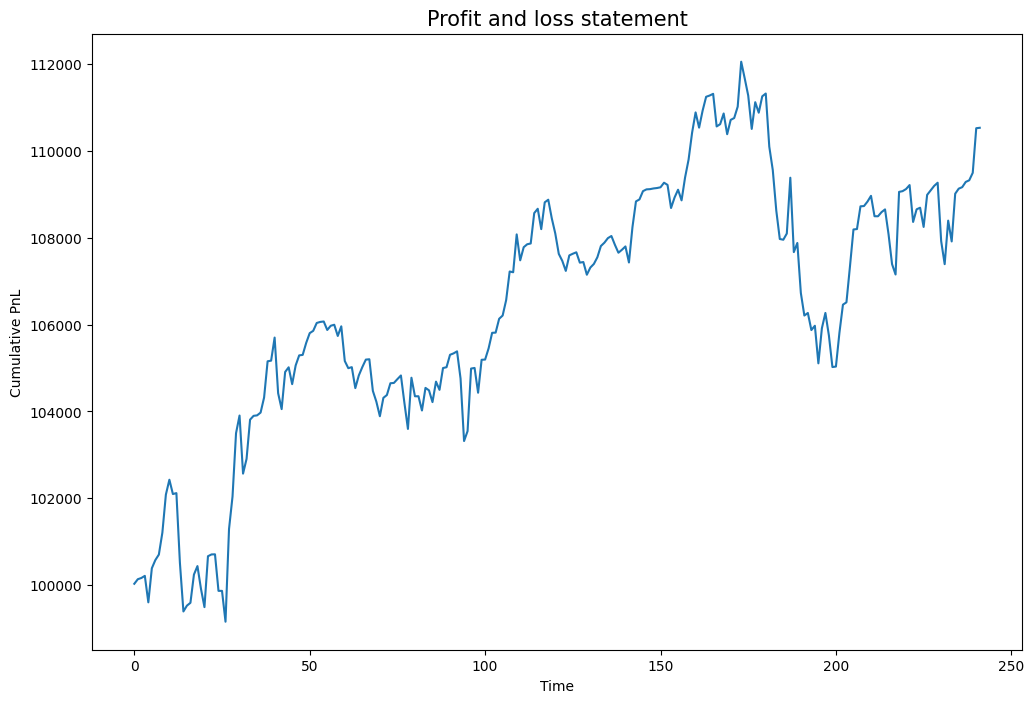

In [7]:
report.plot_cum_pnl()

### Summary per trade

Aggregated information by tickers allows tracking how well or poorly the strategy performs on different instruments. Let's take a look at the top 5 tickers by the number of trades:

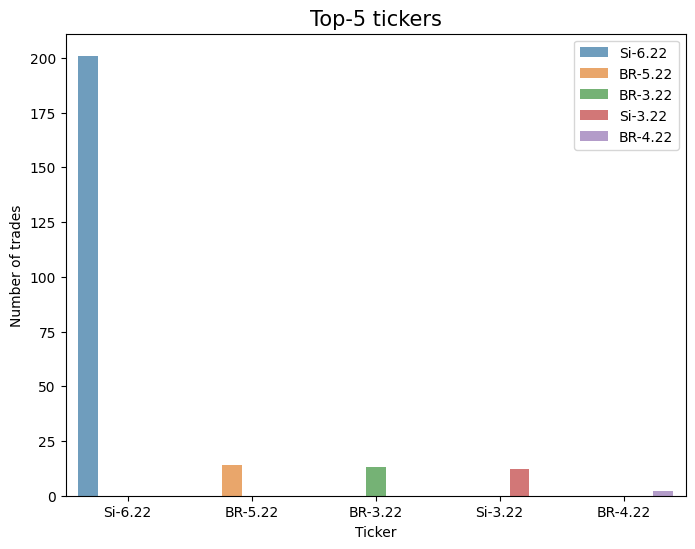

In [8]:
report.plot_unique_tickers()

Let's take a look at the results in numerical terms:

In [9]:
report.summary_per_trade

,pnl,count,profit,lose,win_rate,profit_factor,expected_avg_value
Si-6.22,12898.0,201.0,319.788732,-551.050847,0.706468,0.580325,64.169154
BR-3.22,2121.0,13.0,278.090909,-469.000000,0.846154,0.592944,163.153846
Si-3.22,-236.0,12.0,322.714286,-499.000000,0.583333,0.646722,-19.666667
BR-5.22,-1533.0,14.0,121.333333,-282.625000,0.428571,0.429309,-109.500000
BR-4.22,-2723.0,2.0,NaN,-1361.500000,0.000000,NaN,NaN


Here are the following metrics:

1) `PnL` - the final result for the ticker;
2) `count` - the number of trades executed with the ticker;
3) `Profit` - the average profitable trade;
4) `Lose` -  the average losing trade;
5) `Win_rate` - the ratio of profitable trades to all trades;
6) `Profit_factor` - the ratio of the average profitable trade to the average losing trade;
7) `Expected_avg_value` - the average result of a trade. Equity vector direction.

### Summary

The overall result `summary`, is a dataframe similar to `summary_per_trade`.

In [10]:
report.summary

,pnl,count,profit,lose,win_rate,profit_factor,expected_value,max_dd
summary,10527.0,242,309.975904,-538.539474,0.68595,0.575586,1.394824,6.26969


Here are the following metrics:

1) `PnL` - the final result for the ticker;
2) `count` -  the number of trades executed with the ticker;
3) `Profit` - the average profitable trade;
4) `Lose` - the average losing trade;
5) `Win_rate` - the ratio of profitable trades to all trades;
6) `Profit_factor` - the ratio of the average profitable trade to the average losing trade;
7) `Expected_avg_value` - the average result of a trade. Equity vector direction;
8) `Max_dd` - the maximum drawdown.